In [23]:
from astropy.io import fits, ascii as asc
from matplotlib import pyplot as plt
from astropy.convolution import convolve, Box1DKernel
%matplotlib inline
from utilities_az import spectroscopy as spec

In [28]:
ofile_99em = asc.read('../../data/1999em/1999em_1999-10-30_00-00-00_CTIO-0.9_CASS-DI_SUSPECT.dat', names=['wave', 'flux'])
ofile_05ay = asc.read('../../data/2005ay/2005ay_2005-04-02_00-00-00_GALEX_GALEX_CCCP.', names=['wave', 'flux'])
ofile_swift =  asc.read('../data/swiftuvot/reduced_default/combine_epoch1_rest_dustcorrsca.dat', names=['wave', 'flux'])

spec_99em = spec.spectrum1d(ofile_99em['wave'], ofile_99em['flux'])
spec_05ay = spec.spectrum1d(ofile_05ay['wave'], ofile_05ay['flux'])
spec_15oz = spec.spectrum1d(ofile_swift['wave'], ofile_swift['flux'])

sca_spec_99em = spec.scale_spectra(spec_99em, spec_15oz, wlmin=3000, wlmax=5000)
sca_spec_05ay = spec.scale_spectra(spec_05ay, spec_15oz, wlmin=2000, wlmax=2500)

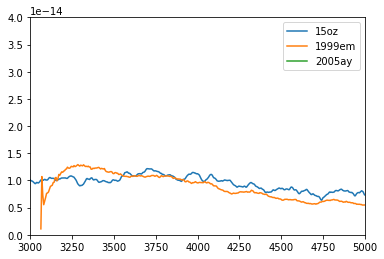

In [30]:
plt.plot(spec_15oz.wave, convolve(spec_15oz.flux, Box1DKernel(11)), label='15oz')
plt.plot(sca_spec_99em.wave, sca_spec_99em.flux, label='1999em')
plt.plot(sca_spec_05ay.wave, sca_spec_05ay.flux, label='2005ay')
plt.ylim(0., 4E-14)
plt.xlim(3000, 5000)
plt.legend()

# Compare to 2012aw Swift obs

In [36]:
ofile1 = asc.read('../../data/2012aw/2012aw_2011-03-23_00-00-00_Swift-UVOT_UV-grism_None.txt', names=['wave', 'flux'])
ofile2 = asc.read('../../data/2012aw/2012aw_2011-03-25_00-00-00_Swift-UVOT_UV-grism_None.txt', names=['wave', 'flux'])
ofile3 = asc.read('../../data/2012aw/2012aw_2011-03-28_00-00-00_Swift-UVOT_UV-grism_None.txt', names=['wave', 'flux'])

spec1 = spec.spectrum1d(ofile1['wave'], ofile1['flux'])
spec2 = spec.spectrum1d(ofile2['wave'], ofile2['flux'])
spec3 = spec.spectrum1d(ofile3['wave'], ofile3['flux'])

sca_spec1 = spec.scale_spectra(spec1, spec_15oz, wlmin=2500, wlmax=5000)
sca_spec2 = spec.scale_spectra(spec2, spec_15oz, wlmin=2500, wlmax=5000)
sca_spec3 = spec.scale_spectra(spec3, spec_15oz, wlmin=2500, wlmax=5000)

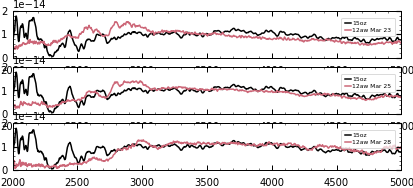

In [55]:
plt.style.use('az-paper-twocol')
fig = plt.figure()
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2, sharex=ax1)
ax3 = fig.add_subplot(3,1,3, sharex=ax1)
ax1.plot(spec_15oz.wave, convolve(spec_15oz.flux, Box1DKernel(5)), label='15oz')
ax1.plot(sca_spec1.wave, sca_spec1.flux, label='12aw Mar 23')
ax1.set_ylim(0, 2E-14)
ax1.set_xlim(2000, 5000)
ax1.legend()

ax2.plot(spec_15oz.wave, convolve(spec_15oz.flux, Box1DKernel(5)), label='15oz')
ax2.plot(sca_spec2.wave, sca_spec2.flux, label='12aw Mar 25')
ax2.set_ylim(0, 2E-14)
ax2.legend()

ax3.plot(spec_15oz.wave, convolve(spec_15oz.flux, Box1DKernel(5)), label='15oz')
ax3.plot(sca_spec3.wave, sca_spec3.flux, label='12aw Mar 28')
ax3.set_ylim(0, 2E-14)
ax3.legend()
plt.savefig('../figures/comp_15oz_12aw.pdf')

(0, 2e-14)

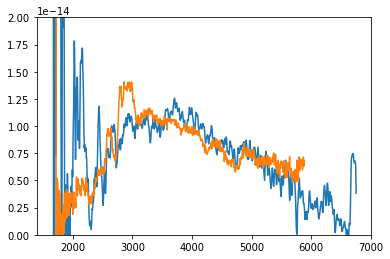

In [47]:
plt.plot(spec_15oz.wave, convolve(spec_15oz.flux, Box1DKernel(5)))
plt.plot(sca_spec2.wave, sca_spec2.flux)
plt.ylim(0, 2E-14)

(0, 2e-14)

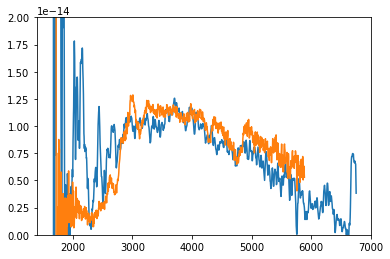

In [48]:
plt.plot(spec_15oz.wave, convolve(spec_15oz.flux, Box1DKernel(5)))
plt.plot(sca_spec3.wave, sca_spec3.flux)
plt.ylim(0, 2E-14)